# General Information
Created by :
- Marsoni David
- Zanya Fernandez Rodriguez

Group : DM_ZF

In [36]:
# install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# Import required libraries

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
    classification_report, confusion_matrix, silhouette_score, 
    precision_score, recall_score, f1_score, auc, roc_curve,roc_auc_score
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


In [38]:
# Constants for the notebook
RANDOM_STATE = 42 # Random state for reproducibility
TEST_SIZE = 0.3   # Test size for train-test split

# 2.2 Data understanding
This dataset contains 2937 rows and 21 features. The target variable is the "Life expectancy" column.

One row represents the data for a person.

In [39]:
# load data from csv file
file_name = 'Life_Expectancy_Data.csv'
df = pd.read_csv(file_name)

In [40]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

This dataset contains 3 categorical features "Country", "Status" and "Year" alongside with 18 numerical features that are either continuous or discrete.

# 2.3 Data preparation
## 2.3.1 Missing values and duplicates

In [41]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Country: 0
Year: 0
Status: 0
Life expectancy: 10
Adult Mortality: 10
infant deaths: 0
Alcohol: 194
percentage expenditure: 0
Hepatitis B: 553
Measles: 0
BMI: 34
under-five deaths: 0
Polio: 19
Total expenditure: 226
Diphtheria: 19
HIV/AIDS: 0
GDP: 448
Population: 652
thinness  1-19 years: 34
thinness 5-9 years: 34
Income composition of resources: 167
Schooling: 163

Number of duplicate rows: 0


We can see that this dataset contains a lot of missing values. 
Particularly, the column "Population" has 652 missing values that represent 22% of the data, or the column "Hepatitis B" that has 553 missing values that represent 19% of the data.

With this amount of missing values, we can't just drop the rows with missing values because we would lose too much data. Instead, to deal with missing values, we will use the mean of the column to fill the missing values.
This method is not the best as it can introduce inconsistent bias.

For the duplicates, we can see that there are no duplicates in the dataset.

In [42]:
def handle_missing_values(df):
    # Loop through each column
    for column in df.columns:
        # Check if column has any missing values
        if df[column].isnull().any():
            # For numeric columns, use mean
            if df[column].dtype.kind in 'iufc': # i - integer, u - unsigned integer, f - float, c - complex
                fill_value = df[column].mean()
                df[column] = df[column].fillna(fill_value)
            # For string/object columns, use mode (most frequent)
            else:
                fill_value = df[column].mode()[0]
                df[column] = df[column].fillna(fill_value)
    
    return df

df = handle_missing_values(df)

print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


After filling in the missing values with the mean of the column, we have now dealt with the missing values.

## 2.3.2 Outliers (Negative values)

Doing an outlier analysis on this dataset is not relevant because the dataset contains a lot of diverse features and values that cannot be considered as outliers. For example, a person from the country "Afghanistan" will have completely different values than a person from the country "USA" for pretty much all the features.

Instead of the outliers' analysis, we will check if there are negative values in the dataset.

In [43]:
# check for negative values in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = (df[numeric_cols] < 0).sum()
print("\nNumber of negative values in each numeric column:")
for column, count in negative_values.items():
    print(f"{column}: {count}")


Number of negative values in each numeric column:
Year: 0
Life expectancy: 0
Adult Mortality: 0
infant deaths: 0
Alcohol: 0
percentage expenditure: 0
Hepatitis B: 0
Measles: 0
BMI: 0
under-five deaths: 0
Polio: 0
Total expenditure: 0
Diphtheria: 0
HIV/AIDS: 0
GDP: 0
Population: 0
thinness  1-19 years: 0
thinness 5-9 years: 0
Income composition of resources: 0
Schooling: 0


Here we can see that there are no negative values in the dataset, which is perfect for our analysis !

## 2.3.3 Data correlation

Data correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people.

In [44]:

def correlationMatrix(data, title):
    # Transform text features into numerical equivalents
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column], _ = pd.factorize(data[column])
    
    # Compute correlation
    corr = data.corr()
    
    # Check if 'Life expectancy' is in the DataFrame and move it to the end
    if 'Life expectancy' in corr.columns:
        cols = corr.columns.tolist()
        cols.remove('Life expectancy')
        cols.append('Life expectancy')
        corr = corr.loc[cols, cols]

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()



#### Correlation matrix plot

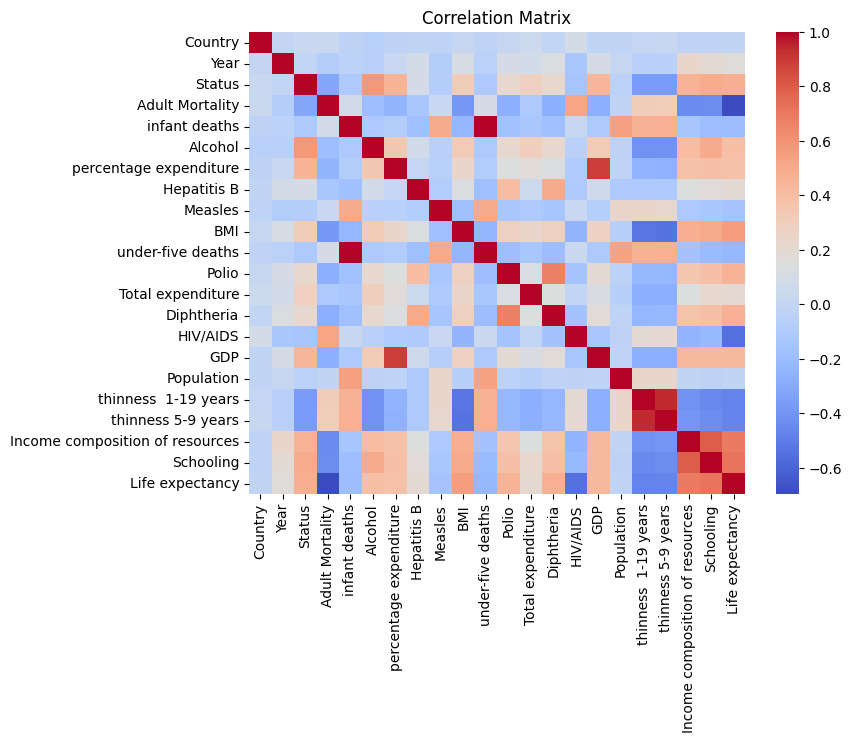

In [45]:
# Store original data
df_original = df.copy()
correlationMatrix(df, 'Correlation Matrix') 
# Restore original data
df = df_original.copy()

In general, The following correlation matrix seems to be quite good.

However, we have observed the following points:
- The "Under-five deaths" and "Infant deaths" columns are highly correlated with each other.
- The "GDP" and "percentage expenditure" columns are highly correlated with each other.
- The "infant deaths" and "under-five deaths" columns are highly correlated with the "Life expectancy" column.
- The "thinness 1–19 years" and "thinness 5–9 years" columns are highly correlated with each other.
- The "Life expectancy" is highly correlated with the "Income composition of resources" and "Schooling" columns.
- The "Income composition of resources" and "Schooling" columns are highly correlated with each other.
- The "Year" and "Country" columns are practically not correlated with any other column.

#### Detail correlation with the target variable

In [46]:
# Store original data
df_original = df.copy()

# Convert string values to unique numbers
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])

# Calculate correlation with the target variable
target_column = 'Life expectancy'
correlation_with_target = df.corr()[target_column].sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)


# Restore original data
df = df_original.copy()

Correlation with target variable:
Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
BMI                                0.559255
Status                             0.481962
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Country                           -0.013475
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
thinness 5-9 years                -0.466629
thinness  1-19 years              -0.472162
HIV/AIDS                          -0.556457
Adult Mortality                   -0.69635

Here we can see that the "Life expectancy" column is highly correlated with the "Income composition of resources" and "Schooling" columns.

For the other columns, there is some correlation, but it is not very high. And furthermore, some correlation is needed to be able to predict the target variable.

#### Remove highly correlated variables

In [47]:
# remove to high correlated columns with the target column and between them and with school column
df = df.drop(columns=['Income composition of resources'])

# drop the column year and country because they are not relevant
df = df.drop(columns=['Year', 'Country'])

# Remove the under five mortality column because very high correlation with the infant deaths column
df = df.drop(columns=['under-five deaths'])

# Remove the Diphtheria column because very high correlation with the Polio column
df = df.drop(columns=['Diphtheria'])

# Remove the pourcentage expenditure column because very high correlation with the GDP column
df = df.drop(columns=['percentage expenditure'])

# Remove the thinness 5-9 years column because very high correlation with the thinness 1-19 years column
df = df.drop(columns=['thinness 5-9 years'])

Here as described above, we have some columns that are highly correlated with each other. To avoid multicollinearity, we will remove theses columns.

#### Updated correlation matrix

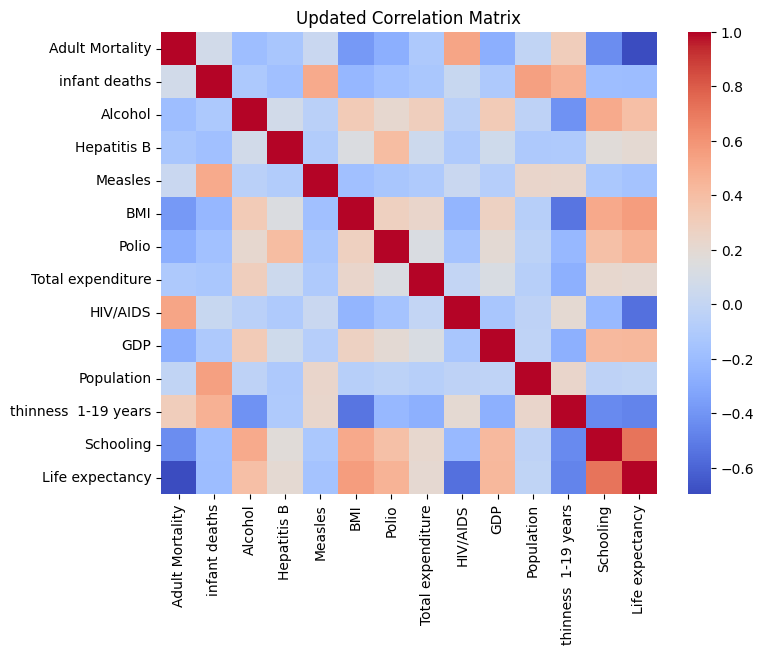

In [48]:
## show again the correlation matrix after removing the columns
# Store original data
df_original = df.copy()

# Create and display correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlationMatrix(numeric_df, 'Updated Correlation Matrix')

# Restore original data
df = df_original.copy()

Here we have decided to re-plotted the correlation matrix after removing the highly correlated columns to have a better view of the remaining columns.

Overall, the updated correlation matrix seems to be quite good.

In [49]:
# Convert string values to unique numbers
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])

features = df.drop(columns=['Life expectancy'])
target = df['Life expectancy']

# print the first 5 rows of the features
print("Cleaned features")
print(features.head())

# print the first 5 rows of the target
print("target")
print(target.head())

Cleaned features
   Status  Adult Mortality  infant deaths  Alcohol  Hepatitis B  Measles  \
0       0            263.0             62     0.01         65.0     1154   
1       0            271.0             64     0.01         62.0      492   
2       0            268.0             66     0.01         64.0      430   
3       0            272.0             69     0.01         67.0     2787   
4       0            275.0             71     0.01         68.0     3013   

    BMI  Polio  Total expenditure  HIV/AIDS         GDP  Population  \
0  19.1    6.0               8.16       0.1  584.259210  33736494.0   
1  18.6   58.0               8.18       0.1  612.696514    327582.0   
2  18.1   62.0               8.13       0.1  631.744976  31731688.0   
3  17.6   67.0               8.52       0.1  669.959000   3696958.0   
4  17.2   68.0               7.87       0.1   63.537231   2978599.0   

   thinness  1-19 years  Schooling  
0                  17.2       10.1  
1                  17.5  

Here just before the end of the data preparation, we converted the categorical columns to numerical columns. This approach is necessary to be able to use the data in the model.

The last step of the data preparation we have done is created 2 new variables "features" and "target". This will help us to use the data in the modelling part.

# 2.4 Modelling

#### Functions

In [50]:
def find_best_k(X, y, param_values=range(1, 11), is_regression=False):
    """
    Find the best k value for K-Nearest Neighbors, for either classification or regression.
    For classification, maximizes accuracy.
    For regression, minimizes MSE.
    """
    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

    best_k = None
    scores_list = []

    # For regression, lower MSE is better; for classification, higher accuracy is better
    if is_regression:
        best_score = float('inf')
    else:
        best_score = float('-inf')

    for k in param_values:
        if is_regression:
            model = KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = mean_squared_error(y_test, y_pred)
            # Lower MSE is better
            if score < best_score:
                best_score = score
                best_k = k
        else: # Classification best auc score
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            score = roc_auc_score(y_test, y_pred_proba)
            # Higher accuracy is better
            if score > best_score:
                best_score = score
                best_k = k
            
                
            
        scores_list.append(score)

    return best_k, best_score, scores_list

## 2.4.1 Classification

### Create a new feature for binary classification

Mean (Average Life Expectancy): 69.22
Median (Threshold): 72.00
High_Life_Expectancy
False    1472
True     1466
Name: count, dtype: int64


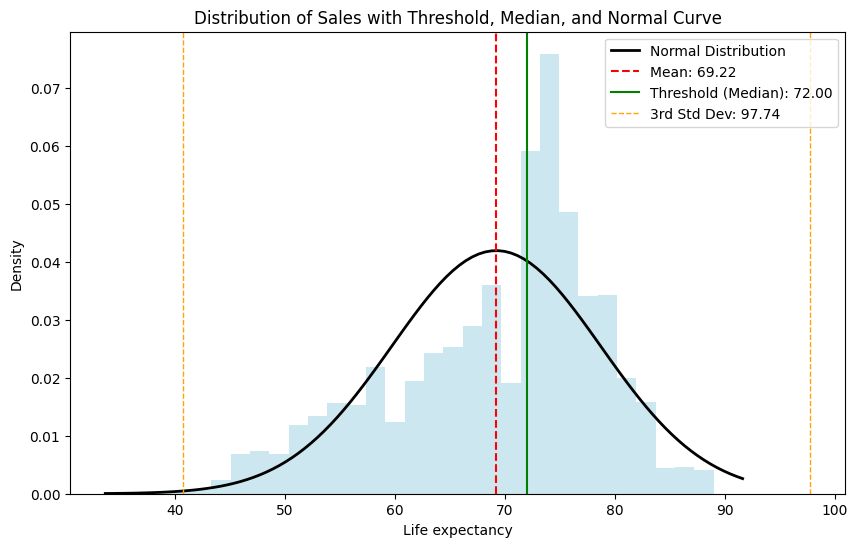

In [51]:
# Calculate the mean
mean = target.mean()

# Calculate the median
median = target.median()

# Use the median as the threshold
threshold = median

# Convert the target variable into binary classes
df['High_Life_Expectancy'] = df['Life expectancy'] > threshold

# Display relevant information
print(f"Mean (Average Life Expectancy): {mean:.2f}")
print(f"Median (Threshold): {median:.2f}")
print(df['High_Life_Expectancy'].value_counts())

# Plot the distribution of sales, the threshold, and the median
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(df['Life expectancy'], bins=30, density=True, alpha=0.6, color='lightblue')

# Add normal distribution curve
mu, std = norm.fit(df['Life expectancy'])
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add threshold and median lines
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', label=f'Threshold (Median): {median:.2f}')

# Add standard deviation lines
plt.axvline(mean + 3*std, color='orange', linestyle='--', label=f'3rd Std Dev: {mean + 3*std:.2f}', linewidth=1)
plt.axvline(mean - 3*std, color='orange', linestyle='--',linewidth=1)

# Labels and title
plt.xlabel('Life expectancy')
plt.ylabel('Density')
plt.title('Distribution of Sales with Threshold, Median, and Normal Curve')
plt.legend()
plt.show()

In [52]:
target_classified = df['High_Life_Expectancy']

Here we have chosen to use the median of the "Life expectancy" column as a threshold to create a new column "Life expectancy binary" that will be used as the target variable for the binary classification.
This choice has been made because the median is close to the mean and the distribution of the "Life expectancy" which allows us to have the same number of data in the two classes.

### Train some classification models 

In [53]:
def evaluate_classifier(model, model_name, classification_results, show_normalized=True):
    """
    Evaluate a classifier model on all features at once, make predictions, calculate performance metrics,
    and visualize the confusion matrix and ROC curve. Trains only once, removing the per-feature plotting.
    """
    # Prepare data
    X = features  # All features at once
    y = target_classified

    scaler = StandardScaler()
    if show_normalized:
        X_data = scaler.fit_transform(X)
    else:
        X_data = X

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

    # Fit model on all features
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Force classification_report to include both 0 and 1 labels
    report = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)

    if "1" in report:
        precision = report["1"]["precision"]
        recall = report["1"]["recall"]
        f1 = report["1"]["f1-score"]
    else:
        precision = recall = f1 = 0.0

    cv_score = cross_val_score(model, X_data, y, cv=5).mean()
    
    roc_auc_value = roc_auc_score(y_test, y_pred_proba)

    # Add row to classification_results
    classification_results.add_row(
        ["All features", model_name, round(roc_auc_value, 3), round(accuracy, 3),
         round(precision, 3), round(recall, 3),
         round(f1, 3), round(cv_score, 3)]
    )

    # Create one figure with two subplots: confusion matrix text and ROC curve
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    table = PrettyTable()
    table.title = f'Confusion Matrix ({model_name})'
    table.field_names = ['Actual \\ Predicted', 'Low Life Exp.', 'High Life Exp.', 'Total']
    table.add_row(['Low Life Exp.', cm[0, 0], cm[0, 1], cm[0, 0] + cm[0, 1]])
    table.add_row(['High Life Exp.', cm[1, 0], cm[1, 1], cm[1, 0] + cm[1, 1]])
    table.add_row(['Total', cm[0, 0] + cm[1, 0], cm[0, 1] + cm[1, 1], cm.sum()])

    display_results = PrettyTable()
    display_results.field_names = ["AUC", "Accuracy", "Precision", "Recall", "F1", "CV Score"]
    display_results.add_row([
        round(roc_auc_value, 3),
        round(accuracy, 3),
        round(precision, 3),
        round(recall, 3),
        round(f1, 3),
        round(cv_score, 3)
    ])

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc_value:.2f})')
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'ROC Curve ({model_name})')
    axes[0].legend(loc="lower right")

    # Show confusion matrix and metrics as text
    axes[1].axis('off')
    axes[1].text(
        0.5, 0.6, str(table),
        horizontalalignment='center', verticalalignment='center',
        fontsize=11, family='monospace'
    )
    axes[1].text(
        0.5, 0.3, str(display_results),
        horizontalalignment='center', verticalalignment='center',
        fontsize=11, family='monospace'
    )
    axes[1].set_title("Confusion Matrix & Stats")

    plt.suptitle(f"{model_name} - Model Evaluation on All Features", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return classification_results

In [54]:
# Create results DataFrame with model column
classification_results = PrettyTable()
classification_results.field_names = ['Feature', 'Model','AUC', 'Accuracy', 'Precision (sensitivity)', 'Recall (specificity)', 'F1', 'CV_Score']

#### K-Nearest Neighbors

Best k for K-Nearest Neighbors: 12


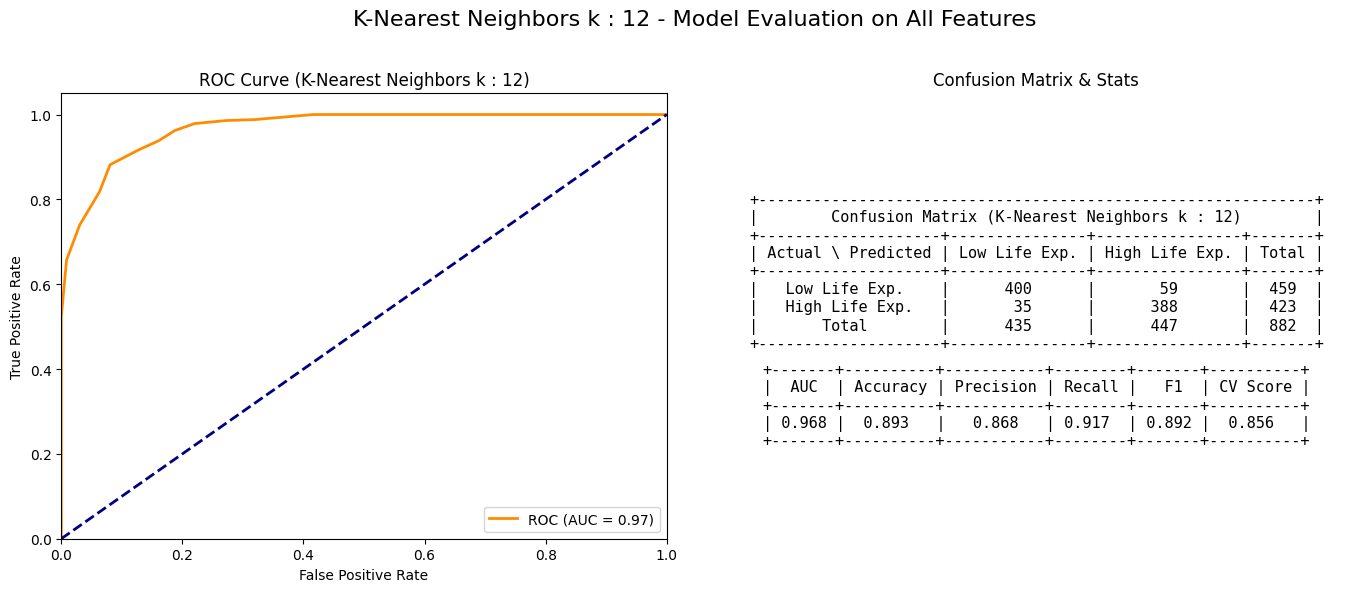

In [55]:
# K-Nearest Neighbors
result = find_best_k(features, target_classified, range(1, 21))
print(f"Best k for K-Nearest Neighbors: {result[0]}")
model = KNeighborsClassifier(n_neighbors=result[0])
k_number_str = str(result[0])
classification_results = evaluate_classifier(model, 'K-Nearest Neighbors k : ' + k_number_str , classification_results)

Here, before the training of the model, we have tried to find the best value for the hyperparameter "k" by testing all the values from 1 to 21 and extracting the best value by using the accuracy score.

#### Logistic Regression

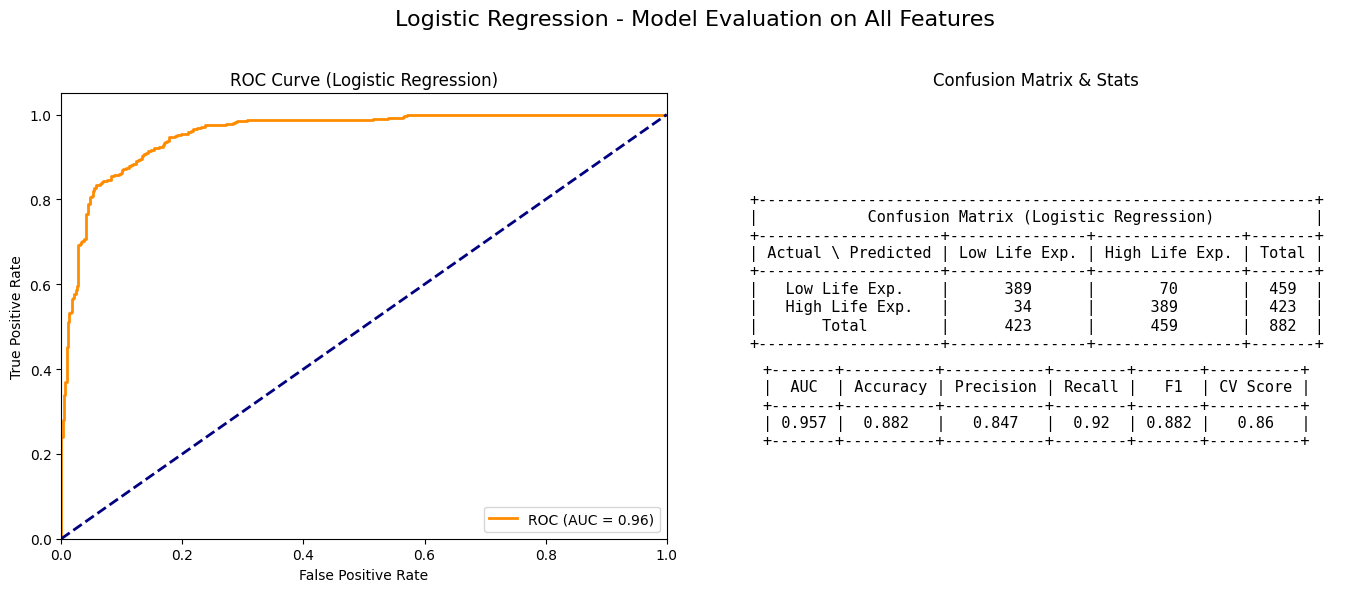

In [56]:
# Logistic Regression
model = LogisticRegression()
classification_results = evaluate_classifier(model, 'Logistic Regression', classification_results)

#### Decision Tree

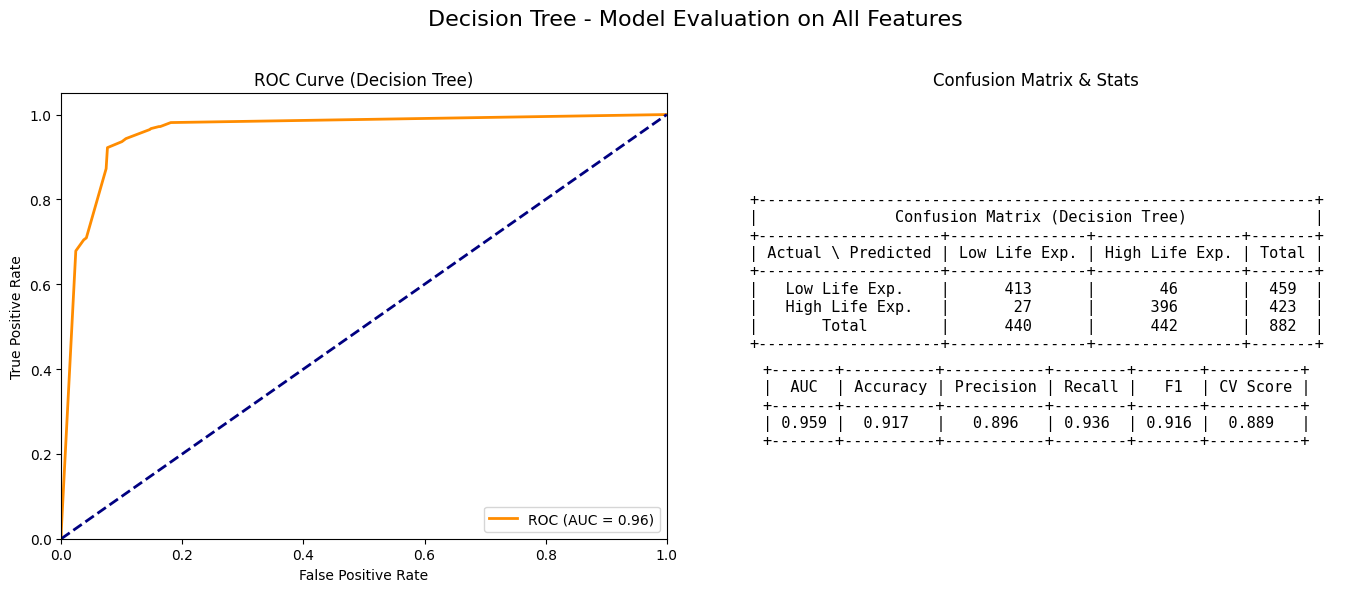

In [57]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=5)
classification_results = evaluate_classifier(model, 'Decision Tree', classification_results)

Here we have tried to find manually the best value for the hyperparameter "max_depth" by testing all the values from 1 to 10 and extracting the best value by comparing the accuracy score and the CV score. And we have found that one of the best value is 5. 

#### Random Forest

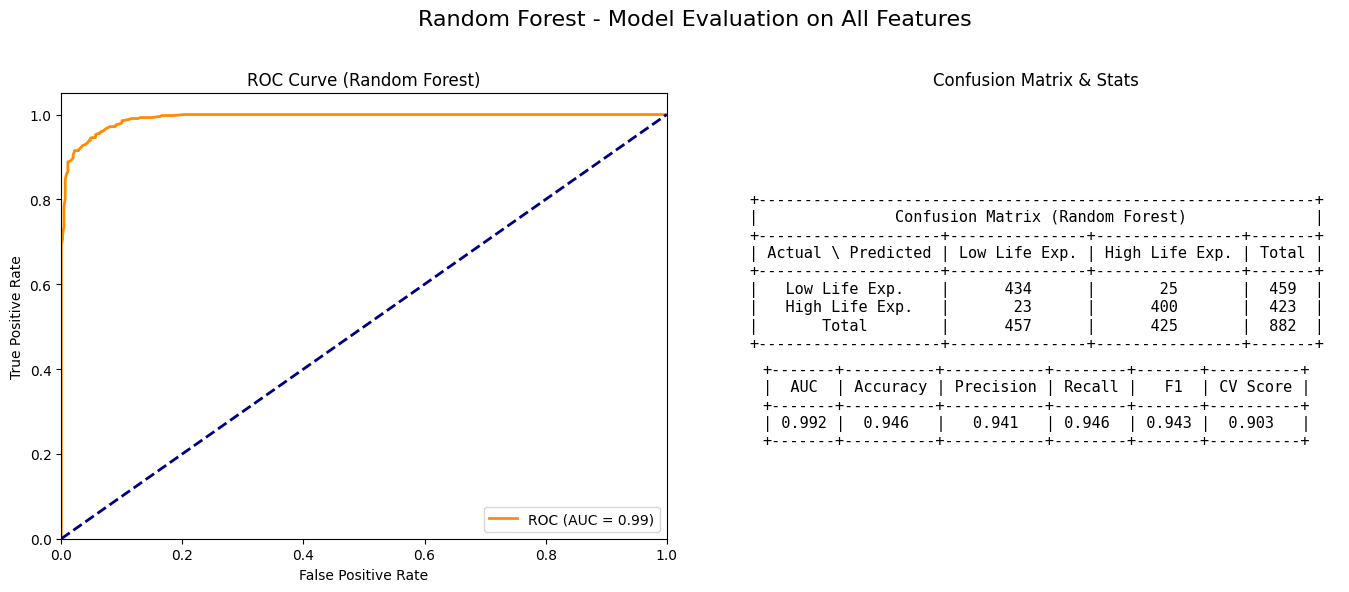

In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification_results = evaluate_classifier(model, 'Random Forest', classification_results)

Here we have not tried to find the best value for the hyperparameter "n_estimators" or max_depth" because we don't really know what are the best values for these hyperparameters. Instead, we have used the default values for the hyperparameters.

#### Naïve Bayes

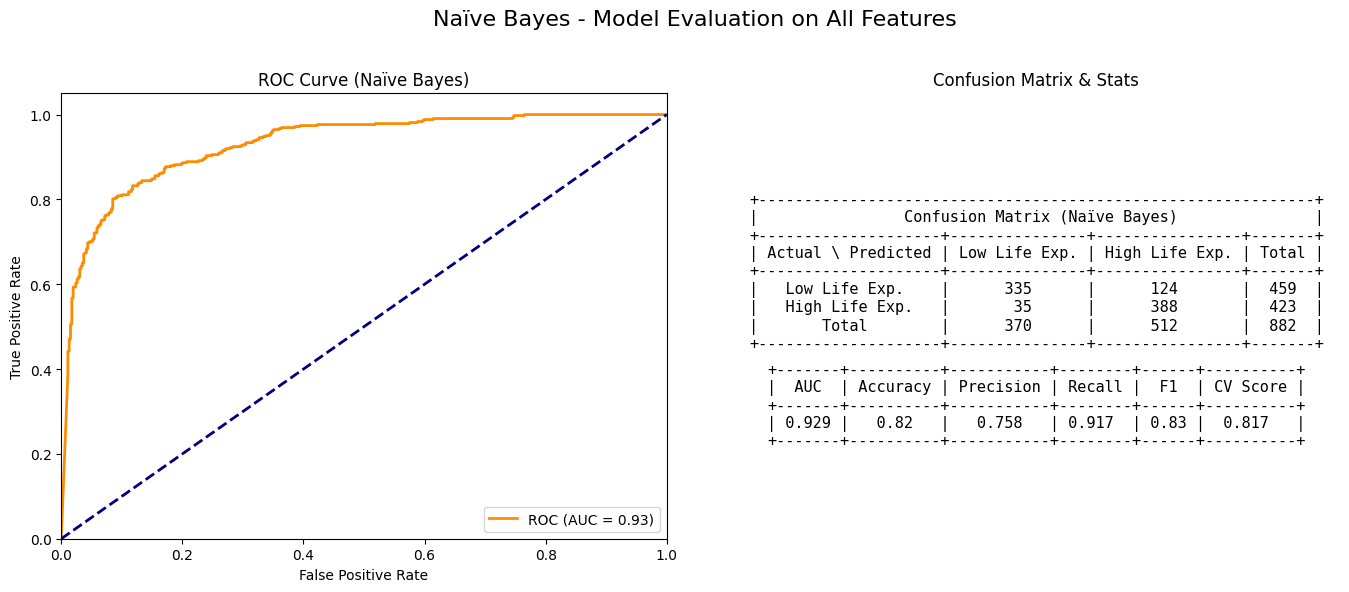

In [59]:
# naïve bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classification_results = evaluate_classifier(model, 'Naïve Bayes', classification_results)

For the Naïve Bayes model, we have used the GaussianNB model because it is the most common model used for Naïve Bayes.

### 2.5.1 Evaluation

#### Best model

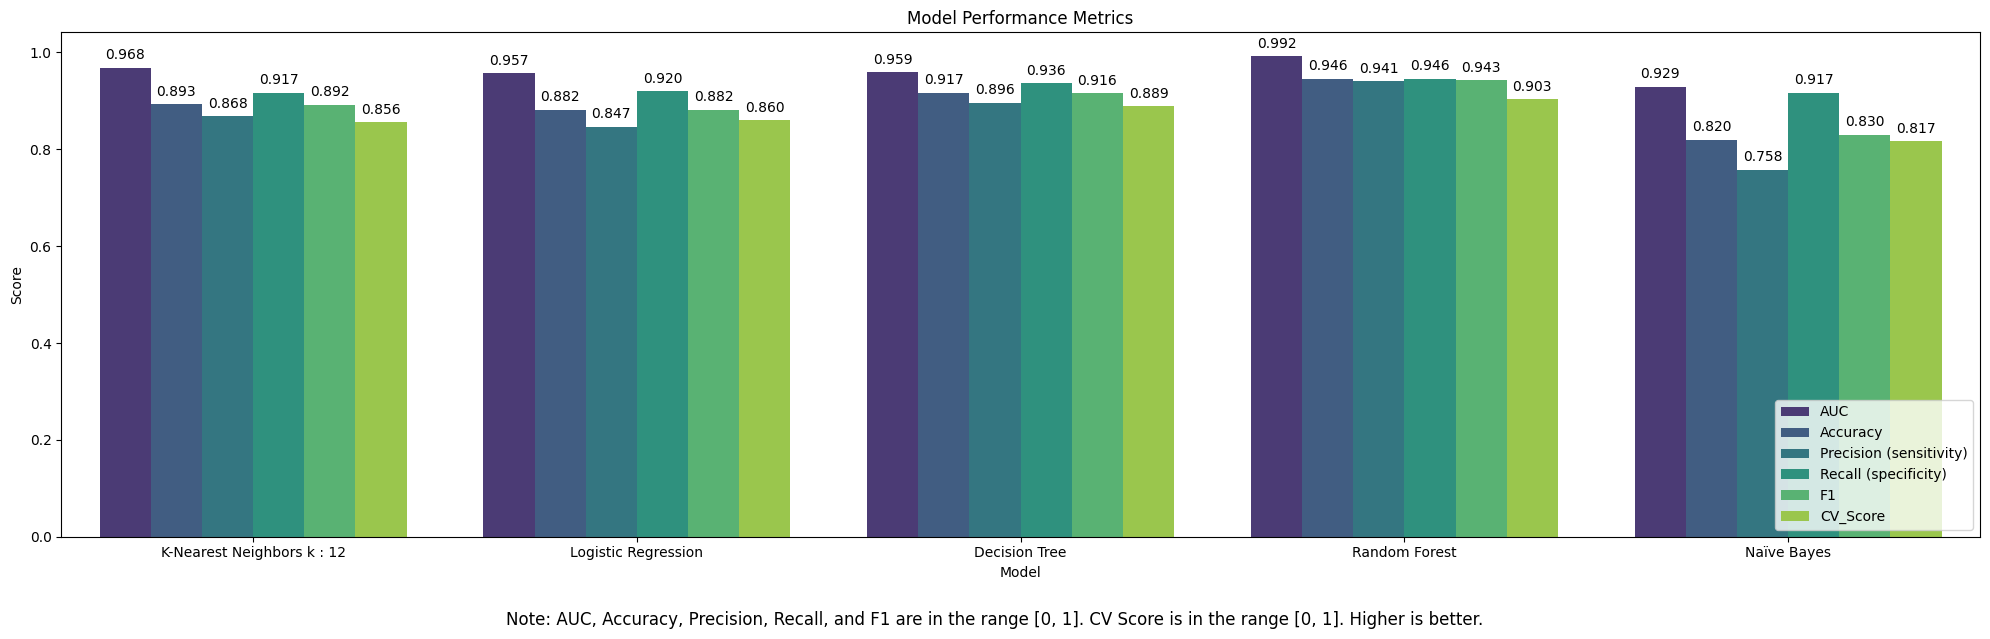

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PrettyTable to DataFrame
df_results = pd.DataFrame(
    [row for row in classification_results._rows], 
    columns=classification_results.field_names
)

# Reshape the DataFrame to long format
df_long = pd.melt(df_results, id_vars=['Model'], var_name='Metric', value_name='Score')

# Keep only numeric rows to avoid plotting "All features"
df_long = df_long[df_long['Metric'] != 'Feature']

# Display results in a histogram 
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_long, palette='viridis')
plt.title('Model Performance Metrics')

# Add labels to the bars
for p in barplot.patches:
    height = p.get_height()
    if height != 0:
        barplot.annotate(format(height, '.3f'), 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points')

# Place the legend at the bottom right
plt.legend(loc='lower right')

# Add subtext below the plot
plt.figtext(0.5, -0.05, "Note: AUC, Accuracy, Precision, Recall, and F1 are in the range [0, 1]. CV Score is in the range [0, 1]. Higher is better.", wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

Here is the result of the evaluation of the models. We can see that the best model is the Random Forest model, with an accuracy score of 0.943.

#### Detailed results

In [61]:
# Sort and display results table
print("\nClassification Results (sorted by F1 score):")
classification_results.sortby = "F1"
classification_results.reversesort = True

print(classification_results)
print("\nNote: Accuracy, Precision, Recall, and F1 are in the range [0, 1]. CV Score is the mean cross-validation score.")


Classification Results (sorted by F1 score):
+--------------+----------------------------+-------+----------+-------------------------+----------------------+-------+----------+
|   Feature    |           Model            |  AUC  | Accuracy | Precision (sensitivity) | Recall (specificity) |   F1  | CV_Score |
+--------------+----------------------------+-------+----------+-------------------------+----------------------+-------+----------+
| All features |       Random Forest        | 0.992 |  0.946   |          0.941          |        0.946         | 0.943 |  0.903   |
| All features |       Decision Tree        | 0.959 |  0.917   |          0.896          |        0.936         | 0.916 |  0.889   |
| All features | K-Nearest Neighbors k : 12 | 0.968 |  0.893   |          0.868          |        0.917         | 0.892 |  0.856   |
| All features |    Logistic Regression     | 0.957 |  0.882   |          0.847          |         0.92         | 0.882 |   0.86   |
| All features |       

In detail, all our models are performing pretty well on this dataset. The Random Forest model is the best model with an accuracy score of 0.95.

## 2.4.2 Regression

In [62]:
# Create a new DataFrame for regression results
regression_results = PrettyTable() 
regression_results.field_names = ["Feature","Model", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R^2 Score", "Residual Sum of Squares (RSS)","Cross Validation Score"]

### Train some regression models 

In [63]:
def evaluate_regressor(model, model_name, regression_results, show_normalized=True, X=None, y=None, transformer=None):
    """
    Evaluate a regressor model on all features at once, make predictions, calculate performance metrics,
    and visualize the residuals.
    """
    if X is None or y is None:
        X = features
        y = target
    
    # Apply transformer (e.g. PolynomialFeatures) if provided; otherwise if show_normalized is True, use StandardScaler
    if transformer is not None:
        X_data = transformer.fit_transform(X)
    elif show_normalized:
        X_data = StandardScaler().fit_transform(X)
    else:
        X_data = X
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    cv_score = cross_val_score(model, X_data, y, cv=5).mean()
    
    regression_results.add_row([
        "All features", model_name, round(mse, 3), round(mae, 3),
        round(r2, 3), round(rss, 3), round(cv_score, 3)
    ])
    
    # Create one figure with two subplots: residuals plot and metrics text
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Residuals plot
    axes[0].scatter(y_test, y_pred, alpha=0.7, s=5)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].set_title(f'Residuals Plot ({model_name})')

    # Metrics table
    table = PrettyTable()
    table.field_names = ["MSE", "MAE", "R2", "RSS", "CV Score"]
    table.add_row([
        round(mse, 3),
        round(mae, 3),
        round(r2, 3),
        round(rss, 3),
        round(cv_score, 3)
    ])

    axes[1].axis('off')
    axes[1].text(
        0.5, 0.5, str(table),
        horizontalalignment='center', verticalalignment='center',
        fontsize=11, family='monospace'
    )
    axes[1].set_title("Regression Metrics")

    plt.suptitle(f"{model_name} - Model Evaluation on All Features", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return regression_results


#### Linear Regression

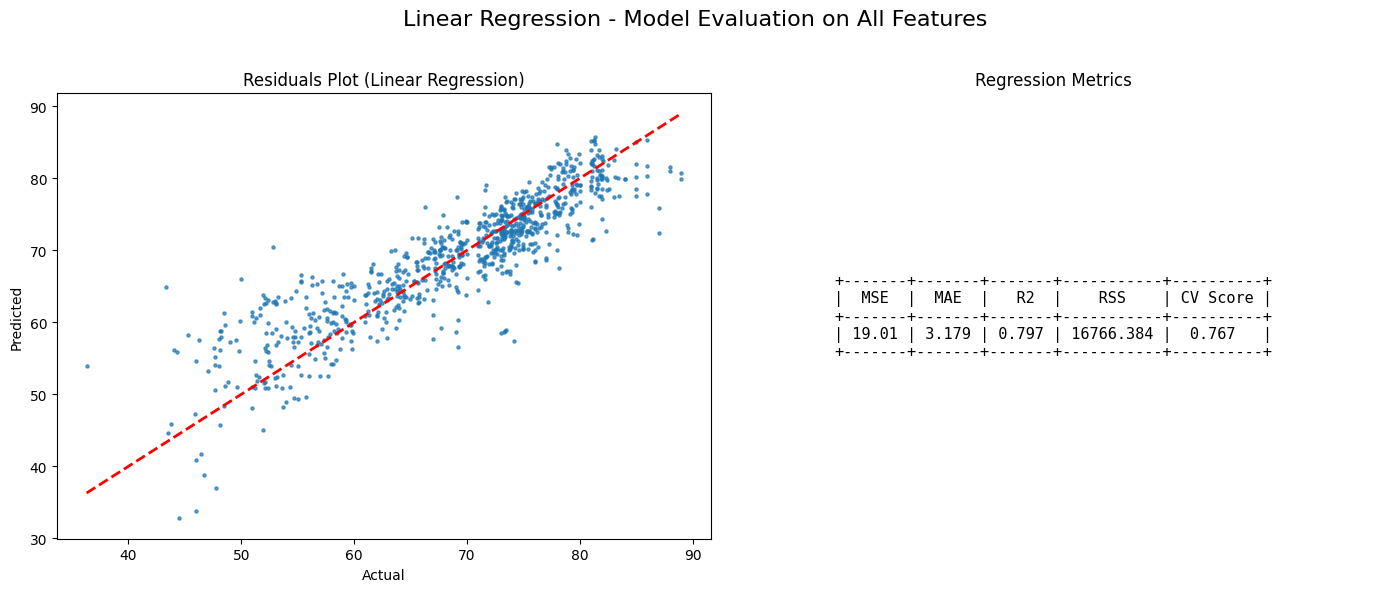

In [64]:
# Linear Regression
model = LinearRegression()
regression_results = evaluate_regressor(model, 'Linear Regression', regression_results)

#### Polynomial Regression

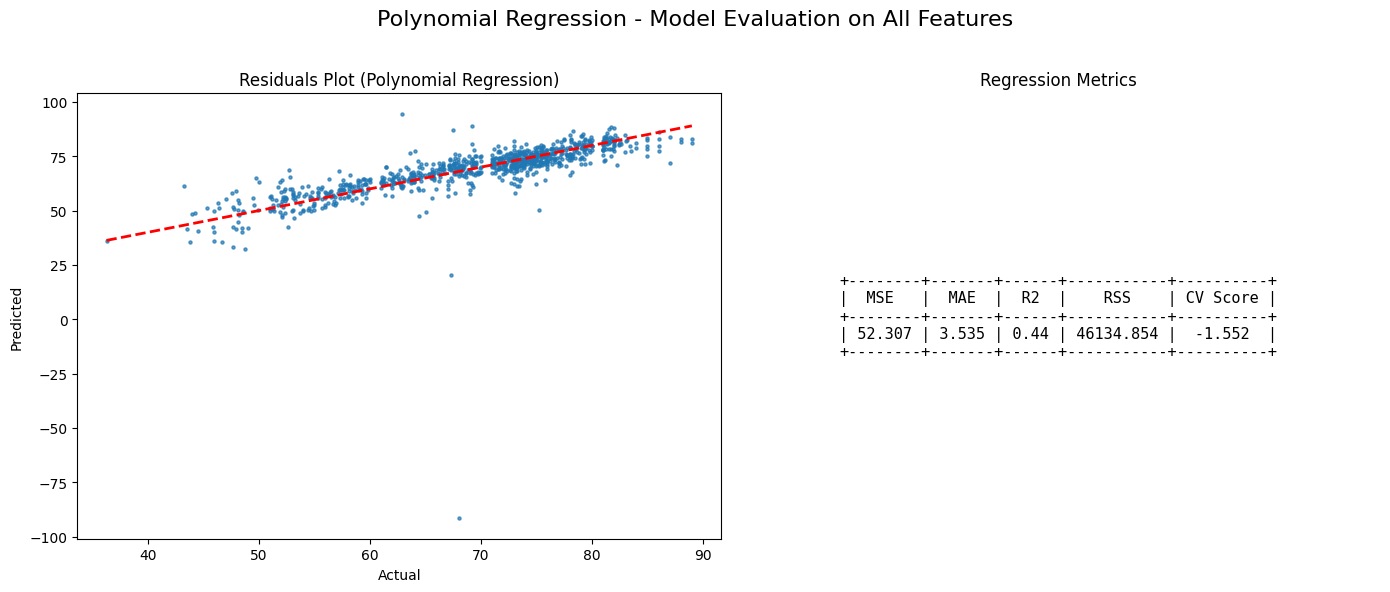

In [65]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)

regression_results = evaluate_regressor(
    model,
    'Polynomial Regression',
    regression_results,
    transformer=poly
)

For the polynomial regression model, we have tried to find the best value for the hyperparameter "degree" manually by testing all the values from 1 to 10 and extracting the best value by comparing the accuracy score and the CV score. But even with the smallest value for the hyperparameter, the model is not performing well. That clearly shows that the polynomial regression model is not the best model for this dataset.

#### Decision Tree Regressor

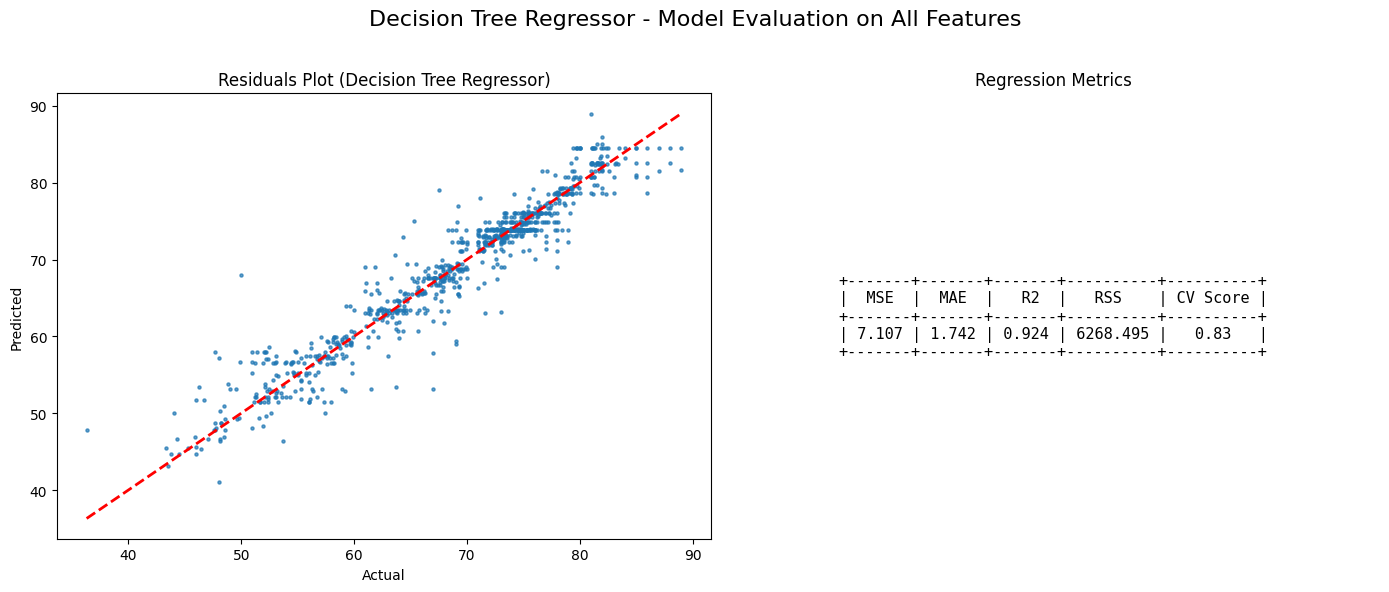

In [66]:
# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=10)
regression_results = evaluate_regressor(model, 'Decision Tree Regressor', regression_results)

For the Decision Tree Regressor model, we have tried to find manually the best value for the hyperparameter "max_depth" by pinking some values and observing the residuals plot and the R2 score. We have found that the best value for the hyperparameter is 10.

#### Random Forest Regressor

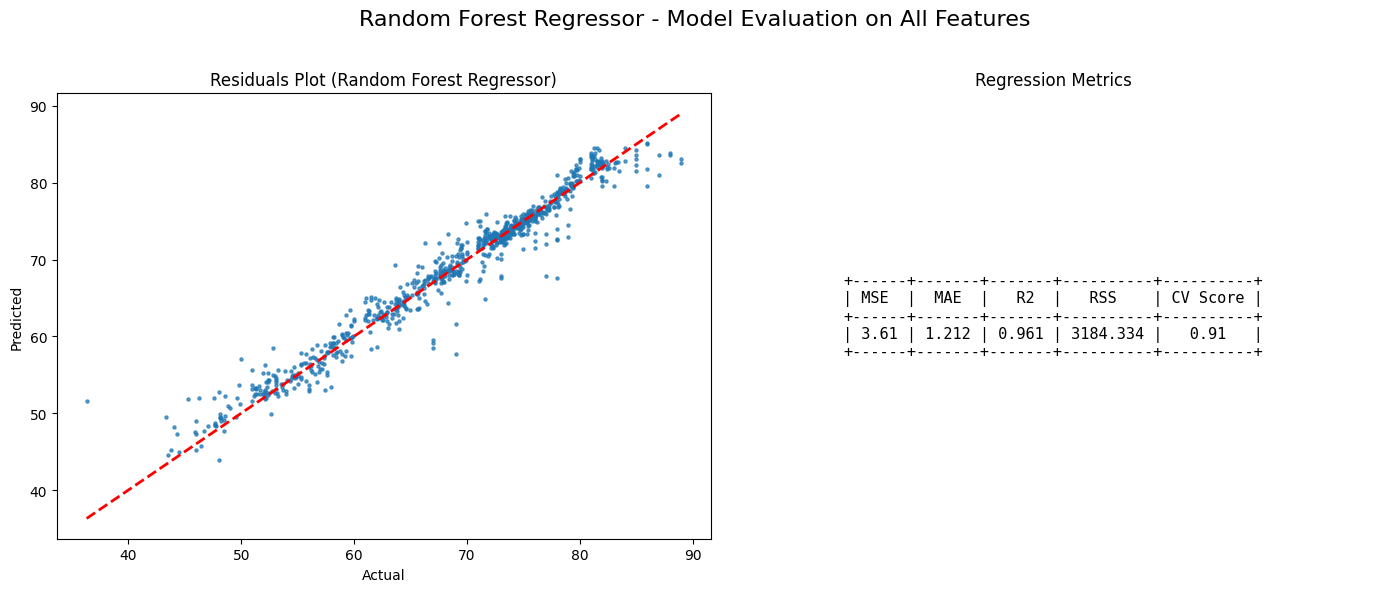

In [67]:
# Random Forest Regressor
model = RandomForestRegressor()
regression_results = evaluate_regressor(model, 'Random Forest Regressor', regression_results)

Here we have not tried to find the best value for the hyperparameter "n_estimators" or max_depth" because we don't really know what are the best values for these hyperparameters. Instead, we have used the default values for the hyperparameters.

We can observe that with the default values for the hyperparameters, the Random Forest Regressor model is overfitting the data a little.

#### K-Nearest Neighbors Regressor

Best k for K-Nearest Neighbors Regressor: 4


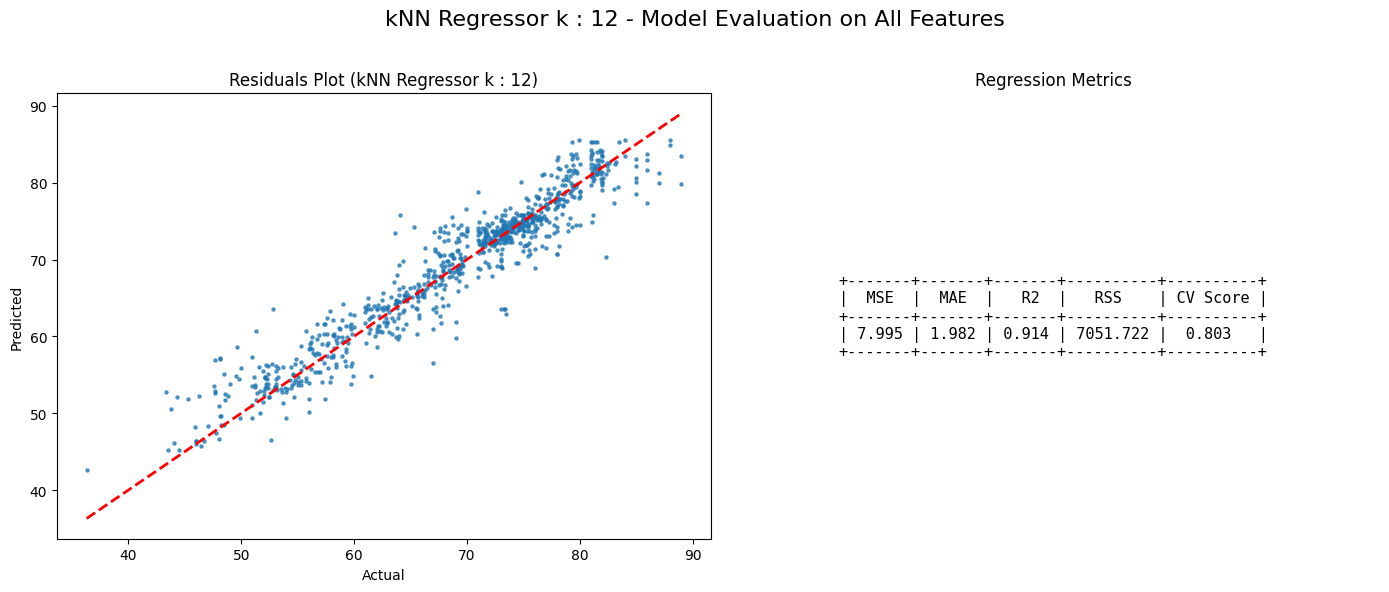

In [68]:
# K-Nearest Neighbors Regressor
result = find_best_k(features, target, range(1, 21), is_regression=True)
model = KNeighborsRegressor(n_neighbors=result[0])
print(f"Best k for K-Nearest Neighbors Regressor: {result[0]}")
regression_results = evaluate_regressor(model, 'kNN Regressor k : ' + k_number_str, regression_results)

### 2.5.2 Evaluation


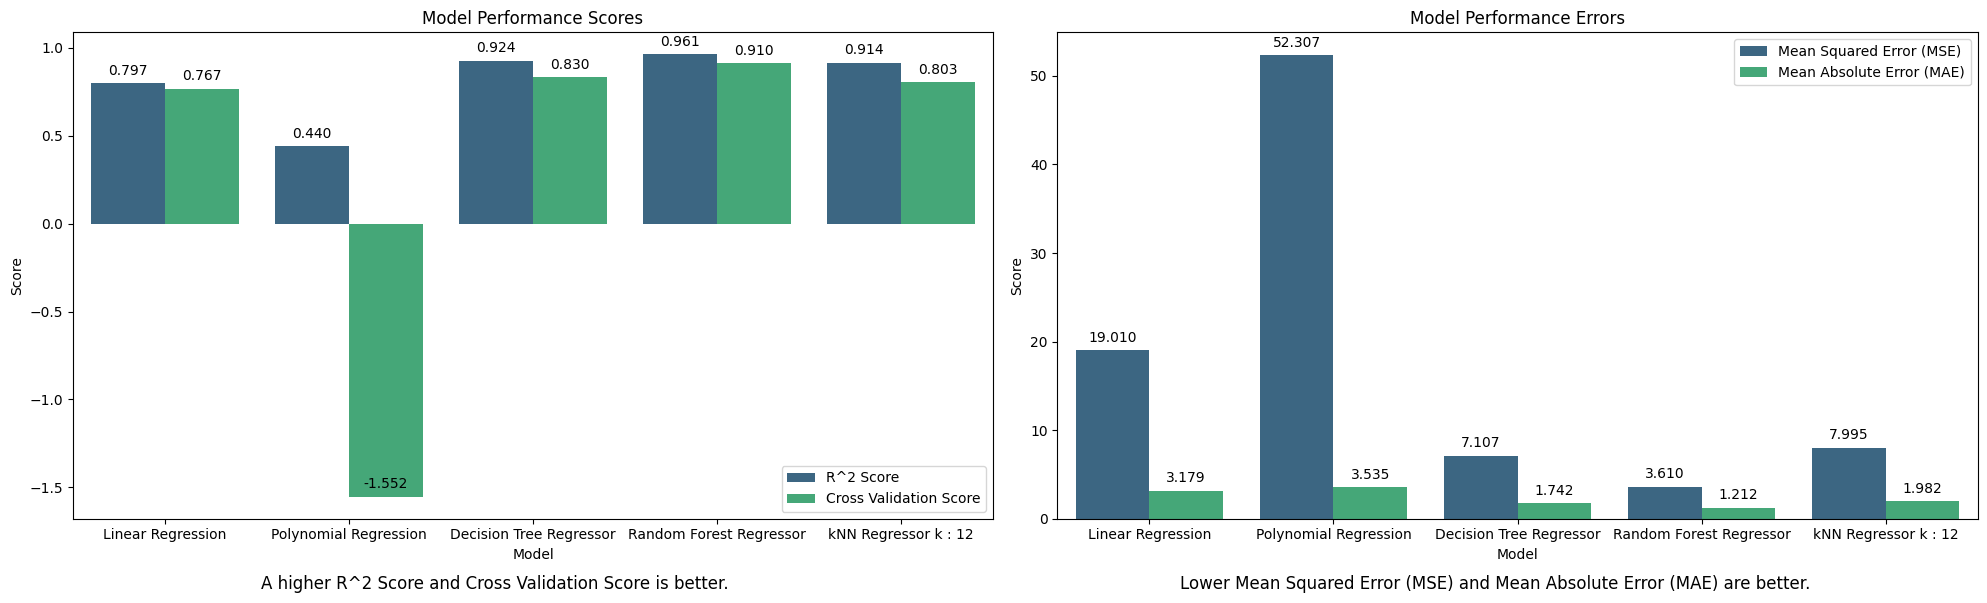

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PrettyTable to DataFrame
df_results = pd.DataFrame(
    [row for row in regression_results._rows],
    columns=regression_results.field_names
)

# Reshape the DataFrame to long format
df_long = pd.melt(df_results, id_vars=['Model'], var_name='Metric', value_name='Score')

# Define the desired metrics for each plot
score_metrics = ['R^2 Score', 'Cross Validation Score']
error_metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)']

# Filter the DataFrame for scores
df_scores = df_long[df_long['Metric'].isin(score_metrics)]

# Filter the DataFrame for errors
df_errors = df_long[df_long['Metric'].isin(error_metrics)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores, palette='viridis', ax=axes[0])
axes[0].set_title('Model Performance Scores')
axes[0].legend(loc='lower right')

# Add labels to the bars for scores
for p in axes[0].patches:
    height = p.get_height()
    if height != 0:
        axes[0].annotate(format(height, '.3f'), 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points')

# Plot for errors
sns.barplot(x='Model', y='Score', hue='Metric', data=df_errors, palette='viridis', ax=axes[1])
axes[1].set_title('Model Performance Errors')
axes[1].legend(loc='upper right')

# Add labels to the bars for errors
for p in axes[1].patches:
    height = p.get_height()
    if height != 0:
        axes[1].annotate(format(height, '.3f'), 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points')

# Add sub-legends below each graph
fig.text(0.25, 0.01, 'A higher R^2 Score and Cross Validation Score is better.', ha='center', fontsize=12)
fig.text(0.75, 0.01, 'Lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) are better.', ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust layout to make room for the sub-legends
plt.show()

Here we can first clearly see the underperformance of the polynomial regression model. This model achieved a negative cross validation score, which is not possible. This is due to the fact that the model is not performing well on this dataset.

The other models are performing well on this dataset. Our best model is the Random Forest Regressor model, with an R2 score of 0.962 and a cross validation score of 0.909.

##### Detailed results

In [70]:
# Sort and display results table
print("\nRegression Results (sorted by Mean Squared Error):")
regression_results.sortby = "Mean Squared Error (MSE)"
regression_results.reversesort = False

print(regression_results)


Regression Results (sorted by Mean Squared Error):
+--------------+-------------------------+--------------------------+---------------------------+-----------+-------------------------------+------------------------+
|   Feature    |          Model          | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R^2 Score | Residual Sum of Squares (RSS) | Cross Validation Score |
+--------------+-------------------------+--------------------------+---------------------------+-----------+-------------------------------+------------------------+
| All features | Random Forest Regressor |           3.61           |           1.212           |   0.961   |            3184.334           |          0.91          |
| All features | Decision Tree Regressor |          7.107           |           1.742           |   0.924   |            6268.495           |          0.83          |
| All features |   kNN Regressor k : 12  |          7.995           |           1.982           |   0.914   |    

With the detailed results, we can see that the Random Forest Regressor model is still the best model with an R2 score of 0.962 and a cross validation score of 0.909.